In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## import packages and dataset

In [2]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [3]:
with open('/content/drive/MyDrive/MyProject/dataset/final_dataset.pickle', 'rb') as file:
    df = pickle.load(file)

df.head(2)

,userid,age,gender,tenure,friends,request,g_likes,r_likes
0,2094382,14,male,266.0,0,0,0,0
1,1192601,14,female,6.0,0,0,0,0


<hr>

In this section we want to analyze data in Python to answer some ad-hoc questions that might be asked in daily-basis business. 

## 1 - Based on age group, which gender does have more friend?

first we should bin age into some groups.

In [15]:
labels = ['5-10','11-15','16-20','21-25','26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']

df['age_group'] = pd.cut(df['age'], bins = np.arange(5,61,5), labels = labels, right = True)

now let's answer the question:

<ipython-input-18-86b09b3b68d7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


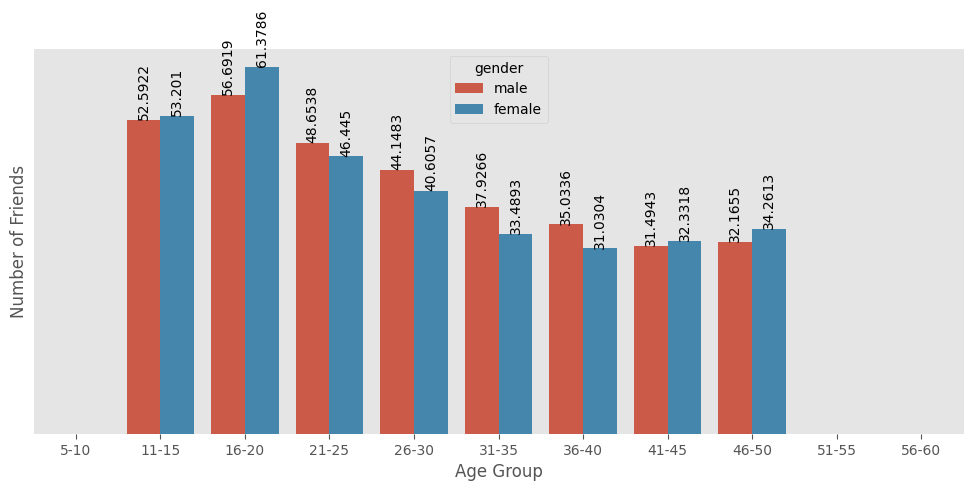

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(
    x=df['age_group'],
    y=df['friends'],
    hue=df['gender'],
    ci=None,
    ax=ax)

#setting of axis
plt.ylabel("Number of Friends")
plt.xlabel("Age Group")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10, rotation=90)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show()

## 2 - How many people do not have any friends? (based on gender)

First we calculate the number of people who have friend (at least one) and have no friend.

In [25]:
fc = df['friends'] == 0
fc

0         True
1         True
2         True
3         True
4         True
         ...  
26040    False
26041    False
26042    False
26043    False
26044    False
Name: friends, Length: 26045, dtype: bool

then we can draw chart:

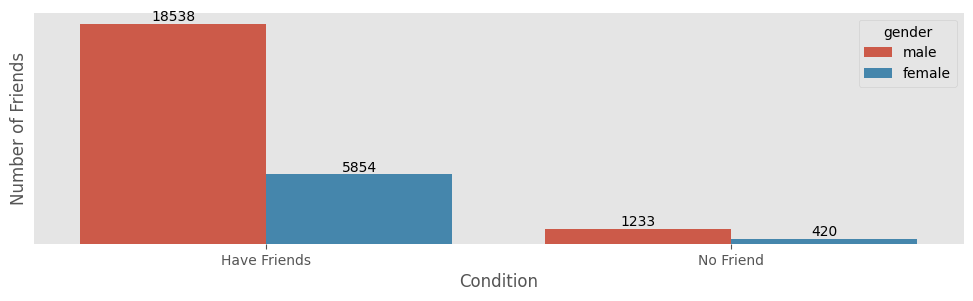

In [26]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.countplot(
    x = fc, 
    hue = df['gender'], 
    ax = ax)

#setting of axis
plt.ylabel("Number of Friends")
plt.xlabel("Condition")
ax.set_xticklabels(['Have Friends', 'No Friend'])
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show()

## 3 - Who did received the most like from other users?

to answer this question, we just need to sort the dataframe based on received like:

In [27]:
df.sort_values(by = 'r_likes', ascending = False)[:5]

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group
17904,1709858,15,female,454.0,57,42,0,4,11-15
15078,1565886,36,male,293.0,37,29,4,4,36-40
23688,2168112,29,male,403.0,118,110,3,4,26-30
11234,1389640,27,male,67.0,23,17,0,4,26-30
20446,1031310,14,male,112.0,74,63,4,4,11-15


## 4 - For every single user, calculate how many like did they get per day?

first, we calculate like per day:

In [30]:
df['likes_per_day'] = df['r_likes'] / df['tenure'].where(df['tenure'] > 0)

and then we can sort the data based on like received and then like per day:

In [31]:
famous = df.sort_values(by =['r_likes', 'likes_per_day'], ascending = False)[:5]
famous

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group,likes_per_day
6109,1952466,36,male,1.0,7,7,1,4,36-40,4.000000
4409,1919733,37,female,2.0,3,3,3,4,36-40,2.000000
11101,1811812,16,male,2.0,22,21,0,4,16-20,2.000000
4562,1059026,21,female,3.0,4,4,0,4,21-25,1.333333
1643,1653309,28,male,5.0,0,0,10,4,26-30,0.800000


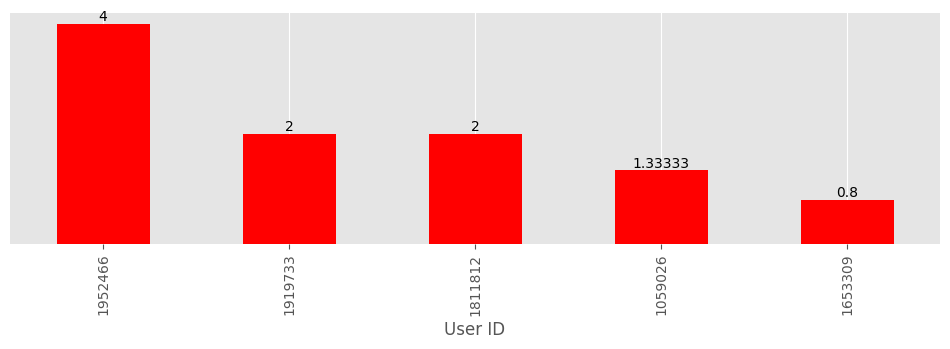

In [32]:
fig, ax = plt.subplots(figsize=(12, 3))

famous.plot(
    x='userid',
    y='likes_per_day',
    kind='bar', 
    color='red',
    ax=ax)

#setting of axis
plt.ylabel("")
plt.xlabel("User ID")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
#remove the legend 
ax.get_legend().remove()

plt.show()

## 5 - Show the users who are interested in to send friendship request

first we filter dataset based on this condition:

In [35]:
followers = df.sort_values(by = 'request', ascending = False)[:5]
followers

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group,likes_per_day
24243,1441181,21,male,110.0,130,116,0,0,21-25,0.000000
24513,1750835,30,male,222.0,136,116,1,2,26-30,0.009009
24324,1477681,20,female,707.0,131,116,2,0,16-20,0.000000
24697,1633818,28,female,353.0,143,116,1,1,26-30,0.002833
25127,1269752,26,female,345.0,161,116,1,0,26-30,0.000000


Then we can draw the plot.

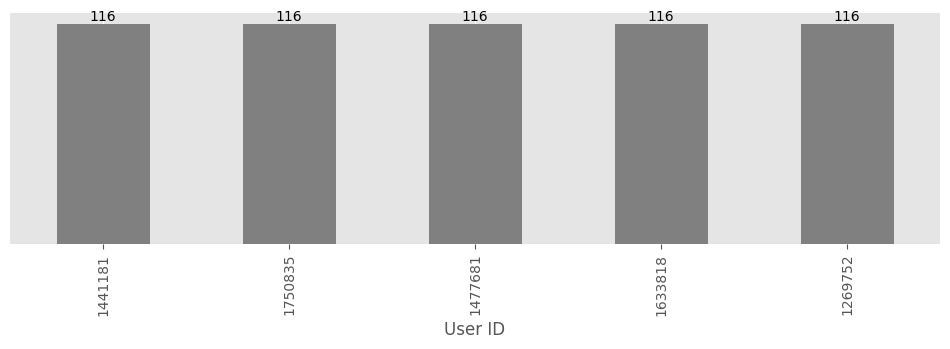

In [36]:
fig, ax = plt.subplots(figsize=(12, 3))

followers.plot(
    x='userid',
    y='request',
    kind='bar', 
    color='gray',
    ax=ax)

#setting of axis
plt.ylabel("")
plt.xlabel("User ID")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
#remove the legend    
ax.get_legend().remove()
    
plt.show()